### Blur

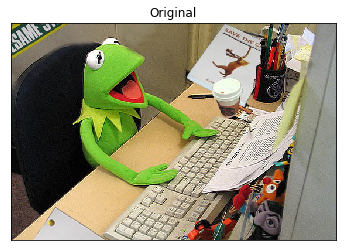

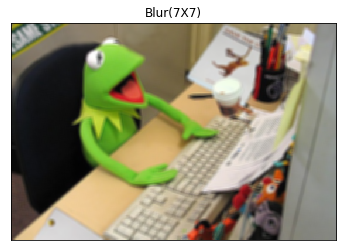

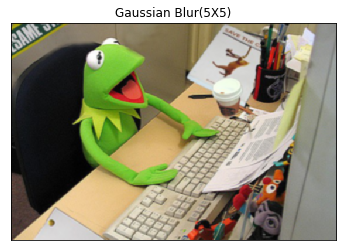

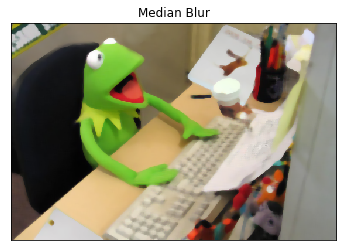

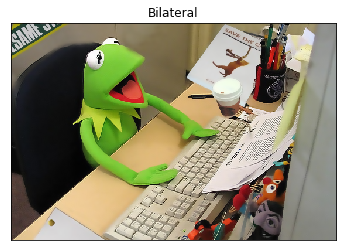

In [6]:
#-*-coding:utf-8 -*-
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../Data/kermit.jpg')

# pyplot를 사용하기 위해서 BGR을 RGB로 변환.
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])


# 일반 Blur
dst1 = cv2.blur(img,(7,7))

# GaussianBlur
dst2 = cv2.GaussianBlur(img,(5,5),0)

# Median Blur
dst3 = cv2.medianBlur(img,9)

# Bilateral Filtering
dst4 = cv2.bilateralFilter(img,9,75,75)

images = [img, dst1, dst2, dst3, dst4]
titles=['Original','Blur(7X7)','Gaussian Blur(5X5)','Median Blur','Bilateral']

for i in range(5):
    plt.imshow(images[i]),plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.show()

### Image Gradient, Edge Detection

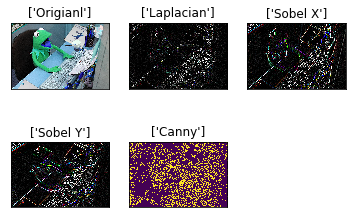

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../Data/kermit.jpg')
canny = cv2.Canny(img,30,70)

laplacian = cv2.Laplacian(img,cv2.CV_8U)
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)

images = [img,laplacian, sobelx, sobely, canny]
titles = ['Origianl', 'Laplacian', 'Sobel X', 'Sobel Y','Canny']

for i in range(5):
    plt.subplot(2,3,i+1),plt.imshow(images[i]),plt.title([titles[i]])
    plt.xticks([]),plt.yticks([])

plt.show()

### Image Pyramid (1. Gaussian Pyramid 2. Laplacian Pyramid)

### Gaussian Pyramid

In [46]:
import cv2

img = cv2.imread('../Data/kermit.jpg')

lower_kermit = cv2.pyrDown(img) # 원본 이미지의 1/4 사이즈
higher_kermit = cv2.pyrUp(img) #원본 이미지의 4배 사이즈

cv2.imshow('img', img)
cv2.imshow('lower', lower_kermit)
cv2.imshow('higher', higher_kermit)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Laplacian Pyramid

Gaussian Pyramid로 생성하며

pyrDown 후 pyrUp을 시행하면 오차가 발생해서 윤곽선이 남게 된다.

(372, 557, 3)
(186, 279, 3)
(372, 558, 3)


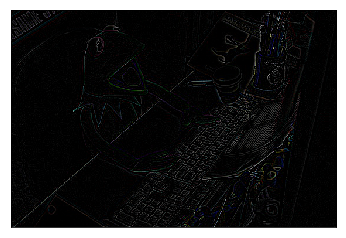

In [33]:
import cv2
img = cv2.imread('../Data/kermit.jpg')
print(img.shape)

GAD = cv2.pyrDown(img)
print(GAD.shape)

GAU = cv2.pyrUp(GAD)
print(GAU.shape)

temp = cv2.resize(GAU, (557, 372))
res = cv2.subtract(img, temp)
plt.imshow(res)
plt.xticks([]), plt.yticks([])
plt.show()